# 00. Table of contents

- Importing libraries and data 
- Subsetting, wrangling, and cleaning time-series data
- Time series analysis: creating line chart and decompositioning
- Conducting Dickey- Fuller test and checking autocorrelation

# 01. Importing libraries and data

In [58]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [59]:
#importing data
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 6\02_Data'
df= pd.read_csv(os.path.join(path, 'Prepared_Data', 'merged_cleaned_dataset_with_gdp.csv'))

# 02. Subsetting, wrangling, and cleaning time-series data

In [60]:
df.head()

,year,metabolite,SiteID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,...,Tuesday,Weekday mean,Weekend mean,Daily mean,latitude,longitude,population,Country Name,GDP per Capita(USD),GDP category
0,2021,amphetamine,AT001,AT,Graz,47.15,37.48,37.95,38.02,38.14,...,35.45,40.03,37.48,38.57,47.070713,15.439504,487040.0,NaN,NaN,NaN
1,2021,cannabis,AT001,AT,Graz,54.77,80.42,60.10,53.88,50.46,...,233.51,122.90,60.37,87.17,47.070713,15.439504,487040.0,NaN,NaN,NaN
2,2021,cocaine,AT001,AT,Graz,127.60,121.48,137.75,174.94,179.55,...,111.91,120.33,152.39,138.65,47.070713,15.439504,487040.0,NaN,NaN,NaN
3,2021,MDMA,AT001,AT,Graz,5.82,4.53,5.27,16.56,17.37,...,7.83,6.06,12.33,9.64,47.070713,15.439504,487040.0,NaN,NaN,NaN
4,2021,methamphetamine,AT001,AT,Graz,12.44,11.24,14.99,9.33,18.66,...,15.66,13.11,13.08,13.09,47.070713,15.439504,487040.0,NaN,NaN,NaN


We have multiple time series data in our df along metabolite and city. Therefore we need to make a subset which we can analyse. I will look for a time series which has the most datapoints.

In [61]:
#checking valuecount for metabolites
df.groupby('metabolite').count()

,year,SiteID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean,latitude,longitude,population,Country Name,GDP per Capita(USD),GDP category
metabolite,,,,,,,,,,,,,,,,,,,,
MDMA,590,590,590,590,586,577,582,584,582,581,582,589,590,590,590,590,590,512,512,512
amphetamine,576,576,576,576,571,570,568,570,568,567,568,576,576,576,576,576,576,509,509,509
cannabis,215,215,215,215,213,214,214,215,212,211,211,215,215,215,215,215,215,170,170,170
cocaine,602,602,602,602,598,589,595,597,593,593,594,602,602,602,602,602,602,524,524,524
methamphetamine,586,586,586,586,583,573,578,580,578,581,580,586,586,586,586,586,586,510,510,510


In [62]:
#cocaine seems to have the highest number of values
# creating subset with cocaine observagtions only
subset_cocaine = df[df['metabolite'] == 'cocaine']

In [63]:
subset_cocaine.head()

,year,metabolite,SiteID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,...,Tuesday,Weekday mean,Weekend mean,Daily mean,latitude,longitude,population,Country Name,GDP per Capita(USD),GDP category
2,2021,cocaine,AT001,AT,Graz,127.60,121.48,137.75,174.94,179.55,...,111.91,120.33,152.39,138.65,47.070713,15.439504,487040.0,NaN,NaN,NaN
7,2020,cocaine,AT001,AT,Graz,98.22,107.09,138.97,277.65,141.82,...,90.27,98.53,168.00,138.22,47.070713,15.439504,487040.0,Austria,48588.65938,Mid income
12,2019,cocaine,AT001,AT,Graz,124.76,117.22,88.68,334.45,174.45,...,131.53,124.50,176.46,154.19,47.070713,15.439504,487040.0,Austria,50114.40111,Mid income
17,2021,cocaine,AT002,AT,Hall-Wattens,178.82,165.84,192.33,265.02,273.44,...,166.59,170.42,230.58,204.80,47.291680,11.592840,78180.0,NaN,NaN,NaN
22,2020,cocaine,AT002,AT,Hall-Wattens,198.51,191.85,188.40,252.67,258.04,...,197.85,196.07,221.02,210.32,47.291680,11.592840,78180.0,Austria,48588.65938,Mid income


In [64]:
#looking for the city with the most cocaine observations
subset_cocaine['City'].value_counts().head(10)

Eindhoven             11
Paris Seine Centre    11
Antwerp Zuid          11
Milan                 11
Zagreb                11
Utrecht               11
Santiago              11
Castellon             11
Oslo                  10
Barcelona             10
Name: City, dtype: int64

In [65]:
#creating a subset of cocaine observations for the city of Eindhoven
subset_cocaine_eindhoven = subset_cocaine[subset_cocaine['City'] == 'Eindhoven']
subset_cocaine_eindhoven_plot = subset_cocaine_eindhoven[['year', 'Daily mean']] #creating a subset of the dataframe for plotting

In [66]:
subset_cocaine_eindhoven_plot.head(20)

,year,Daily mean
1675,2021,623.61
1679,2020,522.95
1683,2019,545.42
1686,2018,426.93
1689,2017,427.78
1692,2016,497.87
1695,2015,323.04
1698,2014,380.83
1699,2013,426.62
1703,2012,349.83


In [67]:
#check datatype of year
subset_cocaine_eindhoven_plot['year'].dtype

dtype('int64')

In [68]:
#change datatype of year to string so that we can work with it as datetime later on
subset_cocaine_eindhoven_plot['year'] = subset_cocaine_eindhoven_plot['year'].astype(str)

In [69]:
#resetting index to the year column
from datetime import datetime

subset_cocaine_eindhoven_plot['datetime'] = pd.to_datetime(subset_cocaine_eindhoven_plot['year']) # Create a datetime column from year
subset_cocaine_eindhoven_plot = subset_cocaine_eindhoven_plot.set_index('datetime') # Set the datetime as the index of the dataframe
subset_cocaine_eindhoven_plot.drop(['year'], axis=1, inplace=True) # Drop the "year" column
subset_cocaine_eindhoven_plot.head(15)

,Daily mean
datetime,
2021-01-01,623.61
2020-01-01,522.95
2019-01-01,545.42
2018-01-01,426.93
2017-01-01,427.78
2016-01-01,497.87
2015-01-01,323.04
2014-01-01,380.83
2013-01-01,426.62


# 03. Time Series Analysis
### creating line chart and decompositioning

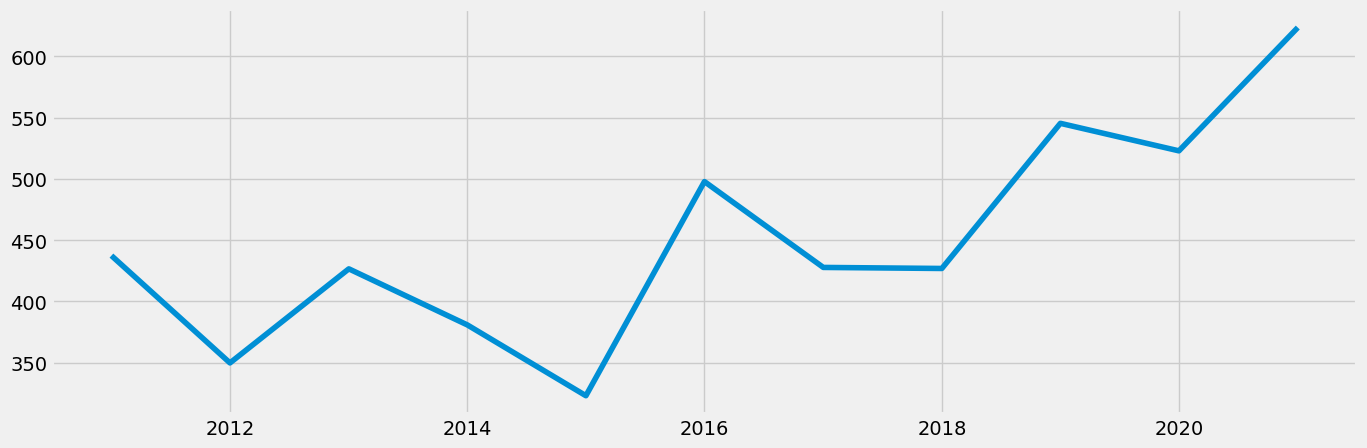

In [70]:
# Plot the time series

plt.figure(figsize=(15,5), dpi=100)
plt.plot(subset_cocaine_eindhoven_plot)

In [71]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(subset_cocaine_eindhoven_plot, model='additive')

In [72]:
from pylab import rcParams # Defining a fixed size for all special charts.
rcParams['figure.figsize'] = 18, 7

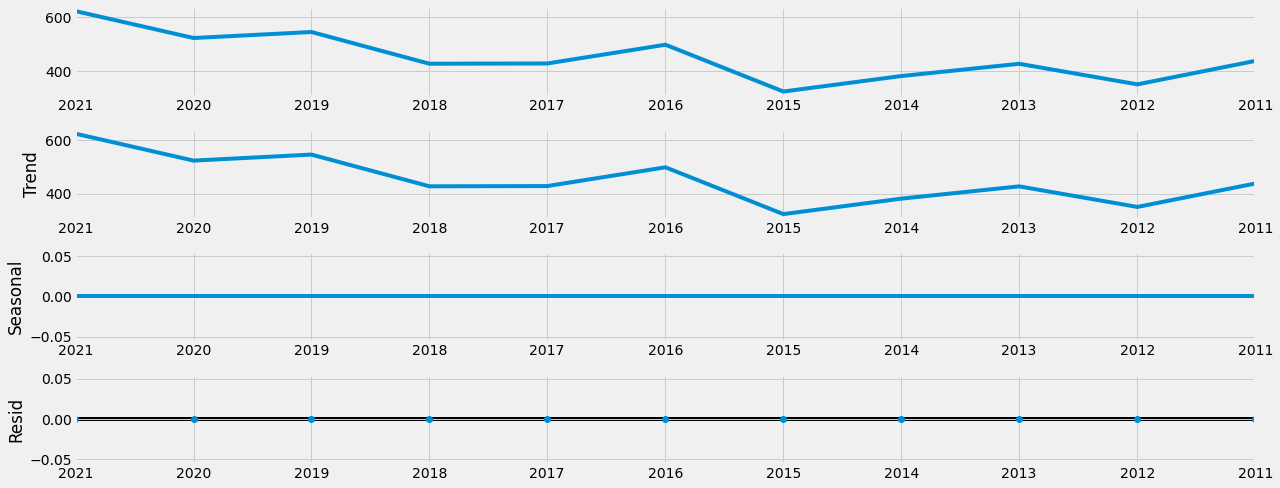

In [73]:
# Plotting the separate components
decomposition.plot()
plt.show()

Decomposing the time series suggest that it has only a trend component. No seasonality and no noise. I guess the issue is that I have too few datapoints in my time series - if I had more we could get more insights from the data.

# 04. Dickey Fuller test

In [75]:
from statsmodels.tsa.stattools import adfuller # Importing the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(subset_cocaine_eindhoven_plot['Daily mean'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.510193
p-value                        0.007729
Number of Lags Used            2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


Our null hypothesis: Our time series data is non stationary.
Our alternative hypothesis: our time series data is stationary.

Using a significance level of 5 percent: the “Critical Value (5%)” has a value of -3.367187. This is larger than the test statistic, which is -3.510193, which means that we can reject the null hypothesis.

# 05. Autocorrelation

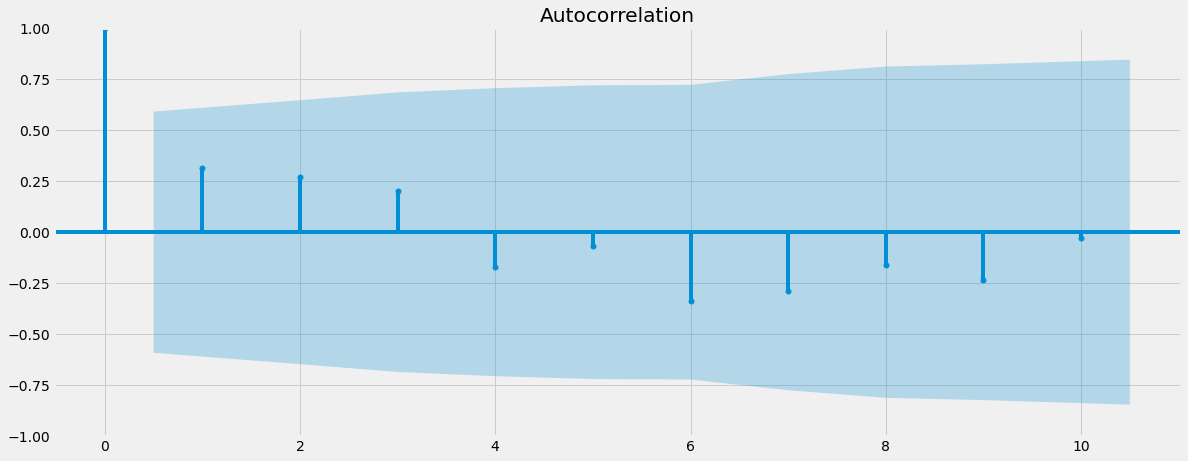

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Importing the autocorrelation and partial correlation plots
plot_acf(subset_cocaine_eindhoven_plot)
plt.show()

There is no autocorrelation in the time series: almost all the lags are within the cofidence interval. This hints again for the stationarity of the time series.